<a href="https://colab.research.google.com/github/Suraj-Btech/Data-Science/blob/main/DS_D3_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Advance Data Cleaning and EDA
# Step - 1

!pip install pandas numpy matplotlib seaborn

In [ ]:
# Step - 2 Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Step - 3 Create Sample dataset with outliers
np.random.seed(42)
data = {
    'age': np.append(np.random.normal(30, 5, 95), [100, 110, 120, 150, 200]),
    'salary': np.append(np.random.normal(50000, 8000, 95), [150000, 200000, 250000, 300000, 500000]),
    'gender': ['Male']*50 + ['Female']*45 + [np.nan]*5,
    'email': ['user' + str(i) + '@example.com' for i in range(95)] + [np.nan]*5
}
df = pd.DataFrame(data)
df.head()

,age,salary,gender,email
0,32.483571,38291.880415,Male,user0@example.com
1,29.308678,52368.962217,Male,user1@example.com
2,33.238443,52088.442177,Male,user2@example.com
3,37.615149,50040.907653,Male,user3@example.com
4,28.829233,48123.302933,Male,user4@example.com


In [ ]:
# Step - 4 Detecting
#4.1 IQR(Inter-Quartile Range) Method

#Q1 - 25%, Q3 - 75%, IQR = Q3 - Q1 Tukey Fences below Q1-1.5xIQR OR above Q3+1.5xIQR

def detect_outliers_iqr(col):
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  return col [(col < lower_bound) | (col > upper_bound)]

outliers_age = detect_outliers_iqr(df['age'])
outliers_salary = detect_outliers_iqr(df['salary'])

print("Outliers in age:\n ", outliers_age)
print("Outliers in salary:\n ", outliers_salary)


Outliers in age:
  74     16.901274
95    100.000000
96    110.000000
97    120.000000
98    150.000000
99    200.000000
Name: age, dtype: float64
Outliers in salary:
  95    150000.0
96    200000.0
97    250000.0
98    300000.0
99    500000.0
Name: salary, dtype: float64


In [ ]:
# 4.2 z-score
from scipy import stats
z_score = np.abs(stats.zscore(df[["age", "salary"]]))
print(z_score[0:5])
outliers = (z_score > 3).any(axis=1)
df[outliers]


[[0.09425814 0.40855652]
 [0.22138688 0.16325679]
 [0.06403163 0.16814499]
 [0.11122005 0.20382423]
 [0.24058478 0.23723939]]


,age,salary,gender,email
96,110.0,200000.0,NaN,NaN
97,120.0,250000.0,NaN,NaN
98,150.0,300000.0,NaN,NaN
99,200.0,500000.0,NaN,NaN


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['salary'].plot(kind='hist', bins=20, title='salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='age', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'age'}, axis=1)
              .sort_values('age', ascending=True))
  xs = counted['age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('age')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['salary']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'salary'}, axis=1)
              .sort_values('salary', ascending=True))
  xs = counted['salary']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('salary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('salary')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['salary'].plot(kind='line', figsize=(8, 4), title='salary')
plt.gca().spines[['top', 'right']].set_visible(False)

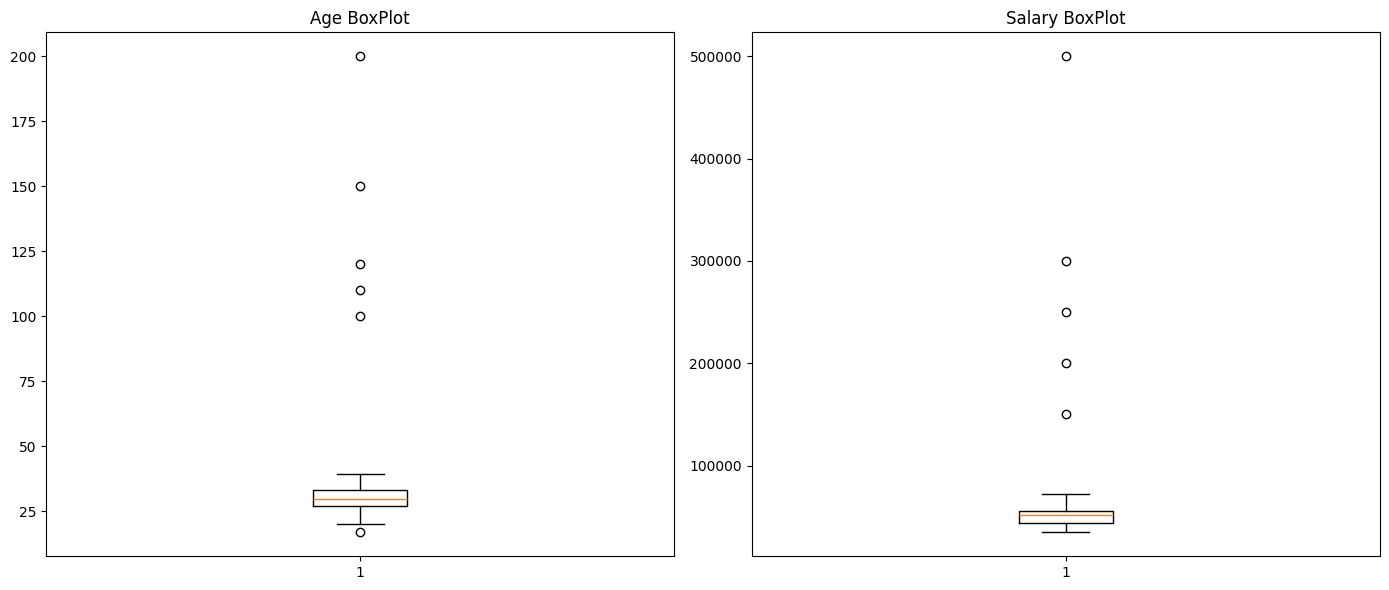

In [ ]:
#Step - 5 Visualization of Outliers
# BoxPlot

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.boxplot(df['age'])
plt.title("Age BoxPlot")

plt.subplot(1,2,2)
plt.boxplot(df['salary'])
plt.title("Salary BoxPlot")

plt.tight_layout()
plt.show()

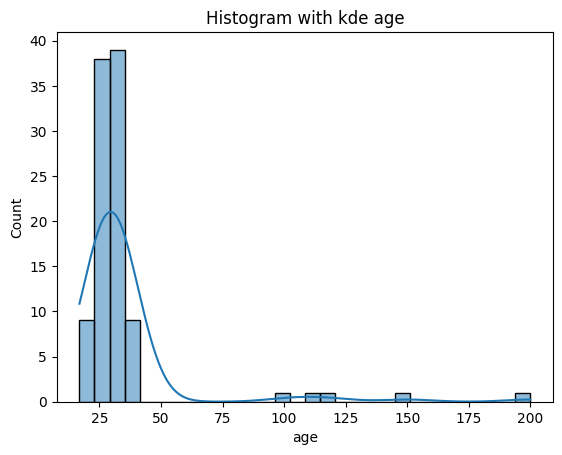

In [ ]:
# Histogram
sns.histplot(df['age'], kde = True, bins = 30)
plt.title("Histogram with kde age")
plt.show()

In [ ]:
# Step - 6 Handling Outliers

def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  return df[(df[column] >= lower) & (df[column] <= upper)]

df_cleaned = remove_outliers_iqr(df, 'age')
df_cleaned = reomve_outliers_iqr(df_cleaned, 'salary')

print("Shape after removing outliers: ", df_cleaned.shape)
df_cleaned = remove_outliers_iqr(df_cleaned, 'salary')

print("Shape after removing outliers: ", df_cleaned.shape)

Shape before removing outliers:  (93, 4)
Shape after removing outliers:  (93, 4)


In [ ]:
# Cap outliers(Winsorization)

def cap_outliers(col):
  lower = col.quantile(0.05)
  upper = col.quantile(0.95)
  return np.where(col < lower, lower, np.where(col > upper, upper, col))

df['age_capped'] = cap_outliers(df['age'])
df['salary_capped'] = cap_outliers(df['salary'])

df[['age', 'age_capped', 'salary', 'salary_capped']].head(10)

,age,age_capped,salary,salary_capped
0,32.483571,32.483571,38291.880415,38657.776381
1,29.308678,29.308678,52368.962217,52368.962217
2,33.238443,33.238443,52088.442177,52088.442177
3,37.615149,37.615149,50040.907653,50040.907653
4,28.829233,28.829233,48123.302933,48123.302933
5,28.829315,28.829315,38677.034064,38677.034064
6,37.896064,37.896064,46634.837418,46634.837418
7,33.837174,33.837174,47258.283868,47258.283868
8,27.652628,27.652628,43581.781846,43581.781846
9,32.712800,32.712800,48709.714307,48709.714307
